In [109]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats
from datetime import date
import seaborn as sns
import env

In [2]:


def get_db_url(data_base):
    return (f'mysql+pymysql://{env.username}:{env.password}@{env.host}/{data_base}')

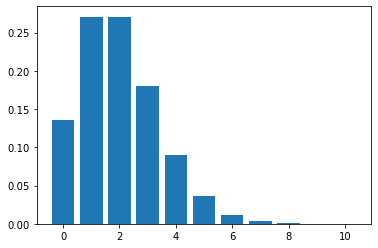

In [119]:
#1
lamb = 2 #\mu + tab will get you mu symbol

x = np.arange(0,11)
y = stats.poisson(lamb).pmf(x) #a stats.poisson that uses the pmf provided by np numbers and stores in y

plt.bar(x,y)
plt.show()

#plots the poisson distribution of number of cars in an hour given that the mean of cars is 2 

In [ ]:
# using the distribution graph its about no cars = about 14% 3 or more is about 32% and at least 1 is about 86%
#using functions:
#the odds of 0 cars in hour:
round(stats.poisson(lamb).pmf(0),2) #use .pmf because it is a specific data point in a discrete data set 

In [101]:
# for 3 or more cars in the hour


stats.poisson(lamb).sf(2) #use .sf, your looking for things above 2. sf is exclusive 


0.32332358381693654

In [102]:
#for 1 or more 
stats.poisson(lamb).sf(0)

0.8646647167633873

In [103]:
#2 state university grads normally distributed with a mean of 3 and sd of .3
mean = 3.0
sd = 0.3

gpa_dist = stats.norm(mean, sd)

# top 5%
round(gpa_dist.isf(.05),2) # think the right 5% of the distribution 


3.49

In [16]:
#the bottom 15%
round(gpa_dist.ppf(.15),2) #think the left 15% of the distribution 

2.69

In [26]:
# figuring the range of GPAs in the 3rd decile 

round(gpa_dist.ppf(.30) , 2) #finding the start of the 3rd decile

2.84

In [108]:
round(gpa_dist.ppf(.2), 2) #finding the start of the 2nd decile everything inbetween is the 3rd decile range 



2.75

In [ ]:
#this can be 2 or more at once using:
gpa_dist.ppf([.2 , .3]) 
# then could have done: (range_of_gpas[0] < 2.8) and (range_of_gpas[1] > 2.8) 

In [ ]:
#yes

In [109]:
round(gpa_dist.cdf(3.5),2) # what percentile 3.5 is in  

0.95

In [110]:
#alternatively 
gpa_dist.sf(3.5) #top percent 3.5 is in, the right 5% 

0.0477903522728147

In [ ]:
#3 A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. 
#this is binom question (click or no click) with a 2% rate and 4326 trials

In [ ]:
trials = 4326
p = .02

click_throughs =  stats.binom(trials, p) #sets up the binom ditribution 

In [ ]:
click_throughs.sf(96) #tells us the likelihood of 97 or more click throughs given the above distribution 

In [116]:
"""#4 You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. 
Looking to save time, you put down random probabilities as the answer to each question.
"""
#binom question with 1% success rate and 60 trials 

'#4 You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. \nLooking to save time, you put down random probabilities as the answer to each question.\n\n'

In [ ]:
n = 60 # number of quesetions bquestions
p = 0.01 # chance of correct answer per quesetion 

homework = stats.binom(n,p) #sets up the binom and saves it too var

In [ ]:
homework.sf(0) #the probability of at least one trial out of the 60 being succesful 

In [120]:
#5 can also be done in piosson 

In [ ]:
"""The codeup staff tends to get upset when the student break area is not cleaned up. 
Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
and on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.
"""
#this is a binom problem clean yes or no with a trail succes being 3%

In [ ]:
students = round(.9 * 66)
p = .03

clean = stats.binom(students , p)

In [ ]:
clean.sf(0) #figuring the odds of a cleaning each day

In [ ]:
# 2 days without cleaning?
n = students * 2 #doubling the number of trials to reflect the increase of days (student visits doubles)
p = 0.03

notclean2 = stats.binom(n,p)

notclean2.pmf(0)

In [ ]:
n = students * 5 #5 days 
p = 0.03

notclean5 = stats.binom(n,p)

notclean5.pmf(0)

In [ ]:
"""
 You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
 After several weeks of careful observation, 
 you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
 If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
 what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?
"""


<AxesSubplot:ylabel='Frequency'>

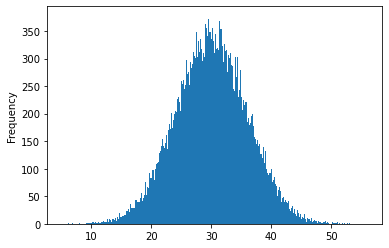

In [114]:
#6
mean = 15*2  #you must convert the ppl into minutes. Everything must be the same unit. You could use ppl instead.
sd = 3*2

line_of_ppl = stats.norm(mean, sd)

pd.Series(line_of_ppl.rvs(100000)).plot.hist(bins=1000)

In [115]:
line_of_ppl.cdf(33)

0.6914624612740131

In [152]:
#7

departments = pd.read_sql("select * from salaries where to_date > now()", get_db_url("employees"))


In [153]:
employess=pd.DataFrame(departments)

In [154]:
employess.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [155]:
mean = employess.salary.mean()
sd = employess.salary.std()

In [156]:
salary_dist = stats.norm(mean, sd)


In [157]:
salary_dist.cdf(60000) # % of employees less than $60 k 

0.24385742480214423

In [ ]:
salary_dist.sf(95_000) # % of employees more than 95 K

In [159]:
salary_dist.cdf(80_000) - salary_dist.cdf(65_000) # the percent of ppl between 80K and 65K

0.3350605685446666

In [160]:
#or done in one line:
np.diff(salary_dist.cdf([65000, 80000]))


array([0.33506057])

In [ ]:
salary_dist.isf(.05) #the top 5%